In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
excel_data = pd.read_excel("samplesuperstore.xlsx")

In [3]:
excel_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Q1: What is the size of the dataset? (Number of rows and columns)

In [6]:
size=excel_data.shape
print(size)

(9994, 13)


In [9]:
print(f"The dataset contains {size[0]} rows and {size[1]} columns")

The dataset contains 9994 rows and 13 columns


Q2: What are the data types of each column?

In [10]:
print(excel_data.dtypes)

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object


Q3: Are there any missing values in the dataset? If so, which columns have
missing values and how many?

In [11]:
excel_data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Q4: What are the unique values in a categorical column of your choice? How
many unique values are there?

In [12]:
excel_data.nunique

<bound method DataFrame.nunique of            Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal Cod

Q5: For a numerical column of your choice, calculate the mean, median, and
standard deviation.

In [15]:
excel_data.columns


Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [24]:
profit = 'Profit'
mean = excel_data[profit].mean()
print(mean)

28.65689630778467


In [25]:
median = excel_data[profit].median()
print(median)

8.6665


In [27]:
std_devtn = excel_data[profit].std()
print(std_devtn)

234.26010769095757


Q6: Identify any potential outliers in a numerical column of your choice. Explain
your approach.

In [28]:

Q1 = excel_data[profit].quantile(0.25)
Q3 = excel_data[profit].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = excel_data[(excel_data[profit] < lower_bound) | (excel_data[profit] > upper_bound)]
outliers


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
10,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Tables,1706.1840,9,0.20,85.3092
13,Standard Class,Consumer,United States,Seattle,Washington,98103,West,Office Supplies,Binders,407.9760,3,0.20,132.5922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,Standard Class,Home Office,United States,New Rochelle,New York,10801,East,Office Supplies,Paper,223.9200,4,0.00,109.7208
9962,First Class,Home Office,United States,Houston,Texas,77041,Central,Furniture,Bookcases,383.4656,4,0.32,-67.6704
9968,Standard Class,Consumer,United States,Plainfield,New Jersey,7060,East,Office Supplies,Binders,735.9800,2,0.00,331.1910
9979,Standard Class,Home Office,United States,Los Angeles,California,90032,West,Office Supplies,Binders,437.4720,14,0.20,153.1152


Q7:Find the correlation between numerical columns and discuss any interesting
relationships.

In [4]:
numerical_data = excel_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()
print("Correlation Matrix:")
print(correlation_matrix)


#Strongest Relationship: Sales and Profit (0.479064). Higher sales are associated with higher profits.
#Negative Relationship: Discount and Profit (-0.219487). Higher discounts tend to reduce profits.
#Weak Relationships: Other correlations are weak, indicating that these variables do not have a strong linear relationship with each other.

Correlation Matrix:
             Postal Code     Sales  Quantity  Discount    Profit
Postal Code     1.000000 -0.023854  0.012761  0.058443 -0.029961
Sales          -0.023854  1.000000  0.200795 -0.028190  0.479064
Quantity        0.012761  0.200795  1.000000  0.008623  0.066253
Discount        0.058443 -0.028190  0.008623  1.000000 -0.219487
Profit         -0.029961  0.479064  0.066253 -0.219487  1.000000


Q8: Group the data by a categorical column and compute the aggregate statistics
(e.g., mean, sum) for a numerical column

In [30]:
excel_data.groupby('Category')['Sales'].agg(['mean', 'sum'])

,mean,sum
Category,,
Furniture,349.834887,741999.7953
Office Supplies,119.324101,719047.0320
Technology,452.709276,836154.0330


Q9:: Based on your analysis, provide a brief summary of any insights or patterns
you discovered in the dataset

In [ ]:
#Sales and Profit:Moderate Positive Correlation: Higher sales generally lead to higher profits.
#Sales and Quantity:Weak Positive Correlation: Selling more items is somewhat associated with higher sales.
#Discount and Profit:Moderate Negative Correlation: Higher discounts tend to reduce profit margins.
#Sales and Discount:Weak Negative Correlation: Discounts have minimal impact on increasing sales.
#Quantity and Profit:Very Weak Positive Correlation: Selling more items has a minimal impact on profitability.
#Quantity and Discount:Negligible Correlation: Quantity sold is not significantly influenced by discounts.

DATA VISUALIZATION 

In [7]:
excel_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [8]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


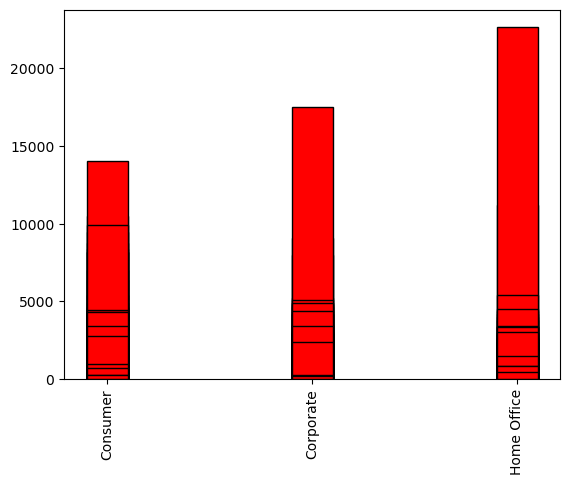

In [14]:
plt.bar(excel_data['Segment'],excel_data['Sales'],color="red",width=0.2,edgecolor="black")
plt.xticks(rotation=90)
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


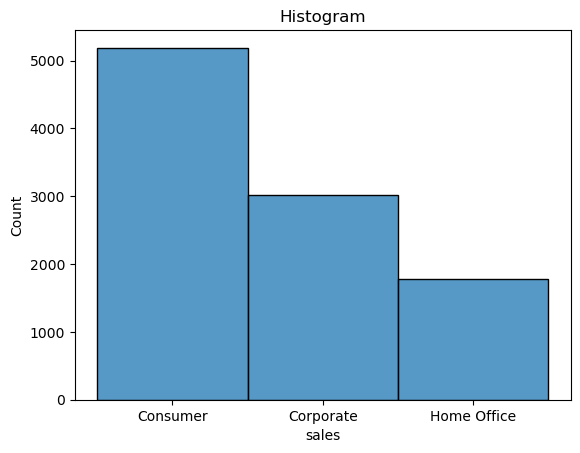

In [22]:
import seaborn as sns
sns.histplot(excel_data['Segment'],bins=10)
plt.title("Histogram")
plt.xlabel('sales')
plt.show()

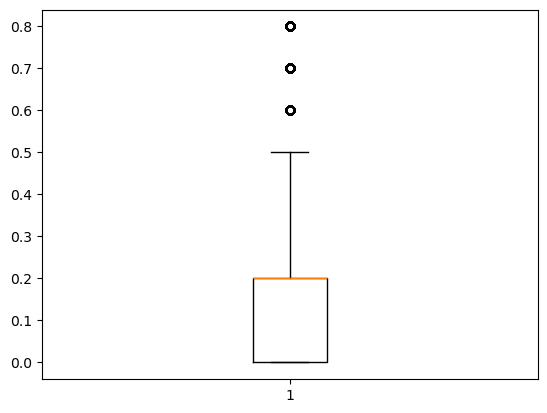

In [26]:
plt.boxplot(excel_data['Discount'])
plt.show()